In [1]:
import numpy as np
import center_algorithms as ca
import matplotlib.pyplot as plt



## Really simple example Gr(3,20)

In [2]:
k=3
n_its = 20
seed = 1

In [3]:

#keep this at 0
np.random.seed(0)
gr_list = []
for i in range(200):
    Y_raw = np.random.rand(20,20)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
for i in range(200):
    Y_raw = np.random.rand(20,20)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:5]
    gr_list.append(Y)


In [4]:
#calculate flagmean
flagmean = ca.flag_mean(gr_list, k, fast = False)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, k, n_its, 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, k, n_its, 'cosine', fast = False, seed = seed)
print('Max Cos finished')

Flag Mean finished
Sine Median finished
Max Cos finished


Text(0.5, 0, 'iteration')

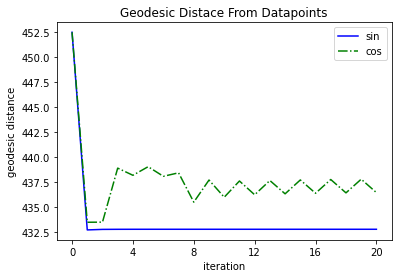

In [5]:
#convergence plot using geodesic distance error
plt.plot(s_err, label = 'sin', color = 'blue', linestyle = 'solid')
plt.plot(c_err, label = 'cos', color = 'green', linestyle = 'dashdot')

plt.legend()
plt.xticks([n for n in range(0,21,4)])
plt.title('Geodesic Distace From Datapoints')
plt.ylabel('geodesic distance')
plt.xlabel('iteration')

In [6]:
#perturbed check
def sanity_check(optimizer, opt_fn, data):

    n,k = optimizer.shape

    sln_val = ca.calc_error_1_2(data, optimizer, opt_fn)

    perturb_vals = []
    for i in range(100):
        perturb = (np.random.rand(n,k)-5)*.01
        perturb_check = np.linalg.qr(perturb + optimizer)[0][:,:k]
        perturb_vals.append(ca.calc_error_1_2(data, perturb_check, opt_fn))

        if opt_fn == 'sine':
            if perturb_vals[i] < sln_val:
                print(perturb_vals[i])
                print(sln_val)
                print('Did not converg to minimizer')
        elif opt_fn == 'cosine':
            if perturb_vals[i] > sln_val:
                print(perturb_vals[i])
                print(sln_val)
                print('Did not converg to minimizer')
    print('No problem with '+opt_fn +' MAAAN')

In [7]:
sanity_check(sin_median, 'sine', gr_list)
sanity_check(max_cosine, 'cosine', gr_list)

No problem with sine MAAAN
No problem with cosine MAAAN


## Now with MNIST

In [8]:
import numpy as np


def load_mnist_data(digits, sample_size=100, set='train'):
    '''
    '''
    if type(digits) == int:
        digits = [digits]

    if type(sample_size) == int:
        sample_size = [sample_size]*len(digits)

    if len(sample_size) != len(digits):
        print('Incorrect number of sample sizes given.')
        return [], []

    return_data = []
    return_labels = []

    for i in range(len(digits)):
        digit = digits[i]
        size = sample_size[i]
        digit_data = np.loadtxt('../MNIST/%s%i.csv' % (set, digit), delimiter=',')
        if digit_data.shape[1] < size:
            print('Sample number for digit %i reduced to %i' % (digit, digit_data.shape[1]))
            return_data.append(digit_data)
            return_labels.append([digit]*digit_data.shape[1])
        else:
            idx = np.random.choice(np.arange(digit_data.shape[1]), size)
            return_data.append(digit_data[idx, :])
            return_labels.append([digit]*size)

    datamat = return_data[0]
    datamat_labels = return_labels[0]

    if len(digits) > 1:
        for i in range(1, len(digits)):
            datamat = np.vstack((datamat, return_data[i]))
            datamat_labels = np.hstack((datamat_labels, return_labels[i]))

    return datamat.T, datamat_labels


In [9]:
k = 2
num_samples2 = 50
num_samples5 = 25
n_its = 20
seed = 1

In [10]:
def run_test(inputs):
    [k,num_samples2,num_samples5,n_its,seed] = inputs
    
    data_matrix2 = load_mnist_data(2, k*num_samples2, set='train')[0]
    data_matrix5 = load_mnist_data(5, k*num_samples5, set='train')[0]

    gr_list = []
    for i in range(num_samples2):
        if k==1:
            point = data_matrix2[:,:k]
            gr_list.append(point/np.linalg.norm(point))
        else:
            point = data_matrix2[:,i*k:(i+1)*k]
            gr_list.append(np.linalg.qr(point)[0][:,:k])

    for i in range(num_samples5):
        if k==1:
            point = data_matrix5[:,:k]
            gr_list.append(point/np.linalg.norm(point))
        else:
            point = data_matrix2[:,i*k:(i+1)*k]
            gr_list.append(np.linalg.qr(point)[0][:,:k])
            
    
    flagmean = ca.flag_mean(gr_list, k, fast = False)
    print('Flag Mean finished')

    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, k, n_its, 'sine', fast = False, seed = seed)
    print('Sine Median finished')

    #calculate maximum cosine
    max_cosine, c_err = ca.irls_flag(gr_list, k, n_its, 'cosine', fast = False, seed = seed)
    print('Max Cos finished')

    return flagmean, sin_median, max_cosine, gr_list

In [11]:
flagmeans = []
sin_medians = []
max_cosines = []
for num_samples5 in range(0,num_samples2,25):
    out = run_test([k,num_samples2,num_samples5,n_its,seed])
    flagmeans.append(out[0])
    sin_medians.append(out[1])
    max_cosines.append(out[2])
dataset = out[3]

Flag Mean finished
Sine Median finished
Max Cos finished
Flag Mean finished
Sine Median finished
Max Cos finished


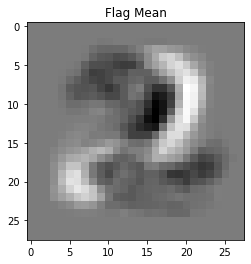

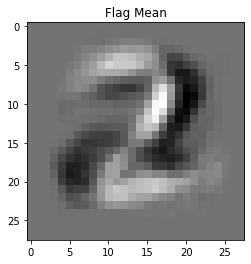

In [12]:
for flagmean in flagmeans:
    plt.figure()
    plt.title('Flag Mean')
    plt.imshow(-flagmean[:,1].reshape(28,28), cmap = 'gray')
    


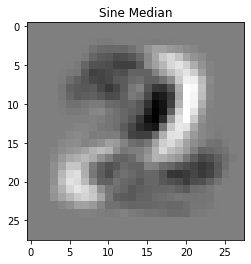

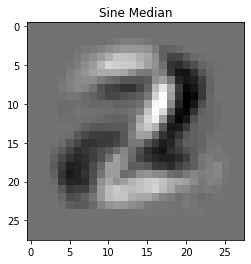

In [13]:
for sine_median in sin_medians:
    plt.figure()
    plt.title('Sine Median')
    plt.imshow(-sine_median[:,1].reshape(28,28), cmap = 'gray')


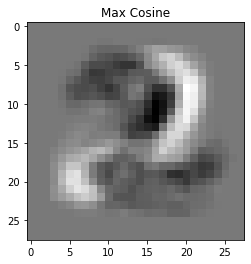

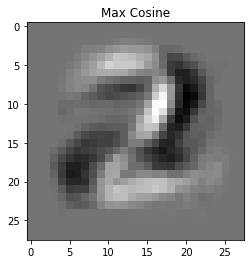

In [14]:
    
for max_cosine in max_cosines:
    plt.figure()
    plt.title('Max Cosine')
    plt.imshow(-max_cosine[:,1].reshape(28,28), cmap = 'gray')

In [15]:
sanity_check(sin_medians[0], 'sine',dataset)
sanity_check(max_cosines[0], 'cosine',dataset)

No problem with sine MAAAN
No problem with cosine MAAAN


In [16]:
#sample objective function values for points with in 100 degrees from [1,0]

sinsq_err = []
sin_err = []
geo_err = []
cos_err = []
thetas = []
Ys = np.vstack([np.random.normal(1, .5, 500), np.random.normal(0, .5, 500)])

sample_list = []
for i in range(-320,320,1):
    theta = i/200
    thetas.append(theta)
    point = np.array([[np.cos(theta)], [np.sin(theta)]])
    sample_list.append(point/np.linalg.norm(point))
    
for Y in sample_list:
#     print(Y.shape)
    sinsq_err.append(ca.calc_error_1_2(gr_list, Y, 'sinesq'))
    sin_err.append(ca.calc_error_1_2(gr_list, Y, 'sine'))
    geo_err.append(ca.calc_error_1_2(gr_list, Y, 'geodesic'))
    cos_err.append(ca.calc_error_1_2(gr_list, Y, 'cosine'))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 2)

In [ ]:
#objective function value plots

thetas_degrees = [t*180/np.pi for t in thetas]

v_line_top = np.max([np.max(sin_err), np.max(geo_err), np.max(cos_err), np.max(sinsq_err)])
v_line_top = np.max([np.max(sin_err), np.max(geo_err), np.max(cos_err), np.max(sinsq_err)])


plt.plot(thetas_degrees, sin_err, label = 'Sine Median', color = 'blue', linestyle = 'solid')
plt.plot(thetas_degrees, geo_err, label = 'Geodesic Median', color = 'orange', linestyle = 'dashed')
plt.plot(thetas_degrees, cos_err, label = 'Maximum Cosine', color = 'green', linestyle = 'dashdot')
plt.plot(thetas_degrees, sinsq_err, label = 'Flag Mean', color = 'red', linestyle = 'dotted')
plt.vlines(np.arctan(sin_median[1]/sin_median[0])*180/np.pi, 0, v_line_top, color = 'blue', linestyle = 'solid')
plt.vlines(np.arctan(geodesic_median[1]/geodesic_median[0])*180/np.pi, 0, v_line_top, color = 'orange', linestyle = 'dashed')
plt.vlines(np.arctan(max_cosine[1]/max_cosine[0])*180/np.pi, 0, v_line_top, color = 'green', linestyle = 'dashdot')
plt.vlines(np.arctan(flagmean[1]/flagmean[0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'dotted')
plt.legend()
plt.xlabel('Angle from Horizontal Axis (degrees)')
plt.ylabel('Objective Function Value')



In [ ]:
#sanity
#optimizer from point sampling vs algorithm
thetas[np.argmax(cos_err)]*180/np.pi, np.arccos(np.abs(max_cosine[0]))[0]*180/np.pi

In [ ]:
#sanity
#optimizer from point sampling vs algorithm
thetas[np.argmin(sinsq_err)]*180/np.pi, np.arccos(np.abs(flagmean[0]))[0]*180/np.pi

In [ ]:
#plot point distribution and optimizers

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(gr_list)):
    plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.5', linestyle = 'dashed')

plt.plot([-sin_median[0,0], sin_median[0,0]],[-sin_median[1,0],sin_median[1,0]], color = 'blue', label = 'Sine Median')
plt.plot([-geodesic_median[0,0], geodesic_median[0,0]],[-geodesic_median[1,0],geodesic_median[1,0]], color = 'orange', linestyle = (0, (5, 1)), label = 'Geodesic Median')
plt.plot([-max_cosine[0,0], max_cosine[0,0]],[-max_cosine[1,0],max_cosine[1,0]], color = 'green', label = 'Maximum Cosine', linestyle = 'dashdot')
plt.plot([-flagmean[0,0], flagmean[0,0]],[-flagmean[1,0],flagmean[1,0]], color = 'red', linestyle = 'dotted', label = 'Flag Mean')
plt.xlim(-1,1)
plt.ylim(-1,1)
ax.set_aspect('equal')
plt.axis('off')

# Robustness Check

In [ ]:
plt.plot(thetas_degrees, sin_err, label = 'Sine Median', color = 'blue', linestyle = 'solid')
for seed in range(200):
    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, k, n_its, 'sine', fast = False, seed = seed)
    plt.vlines(np.arctan(sin_median[1]/sin_median[0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'solid')

plt.legend()
    


In [ ]:
plt.plot(thetas_degrees, geo_err, label = 'Geodesic Median', color = 'orange', linestyle = 'dashed')
for seed in range(200):
    #calculate geodesic median
    geodesic_median, g_err = ca.irls_flag(gr_list, k, n_its, 'geodesic', fast = False, seed = seed)
    plt.vlines(np.arctan(geodesic_median[1]/geodesic_median[0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'solid')

plt.legend()
    


In [ ]:
plt.plot(thetas_degrees, cos_err, label = 'Maximum Cosine', color = 'green', linestyle = 'dashdot')
for seed in range(200):
    #calculate geodesic median
    max_cosine, c_err = ca.irls_flag(gr_list, k, n_its, 'cosine', fast = False, seed = seed)
    plt.vlines(np.arctan(max_cosine[1]/max_cosine[0])*180/np.pi, 0, v_line_top, color = 'red')
plt.legend()
    

In [ ]:
#only works with unique minimizer

weight_type = 'geodesic'

if weight_type == 'cosine':
    optimum = np.max(cos_err)
elif weight_type == 'sine':
    optimum = np.min(sin_err)
elif weight_type == 'geodesic':
    optimum = np.min(geo_err)
bad_Ys = []
for seed in range(200):
    best, c_err = ca.irls_flag(gr_list, k, n_its, weight_type, fast = False, seed = seed)
    opt_fn_val = ca.calc_error_1_2(gr_list, best, weight_type)
    if opt_fn_val >  optimum +.1 or opt_fn_val < optimum - .1:
        bad_seed= seed
        np.random.seed(seed)
        Y_raw = np.random.rand(2,1)-.5
        Y = np.linalg.qr(Y_raw)[0][:,:1]
        bad_Ys.append(Y)
    
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(gr_list)):
    plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.2', linestyle = 'dashed')

for Y in bad_Ys:
    plt.plot([-Y[0], Y[0]],[-Y[1],Y[1]], color = 'red', linestyle = 'solid', alpha= .3)
    

plt.xlim(-1,1)
plt.ylim(-1,1)
ax.set_aspect('equal')
plt.axis('off')

In [ ]:
opt_fn_val